In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [3]:

df_sess_4 = pd.read_pickle("../data/interim/df_apps_clean_4.pkl")


In [4]:
df_sess_4

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,Age
0,1,Cash loans,1,N,Y,0,406597.5,24700.5,351000.0,Unaccompanied,...,Laborers,2,2,0,Business Entity Type 3,2.0,2.0,-1134.0,0.0,25.920547
1,0,Cash loans,0,N,N,0,1293502.5,35698.5,1129500.0,Family,...,Core staff,1,1,0,School,0.0,0.0,-828.0,0.0,45.931507
2,0,Revolving loans,1,Y,Y,0,135000.0,6750.0,135000.0,Unaccompanied,...,Laborers,2,2,0,Government,0.0,0.0,-815.0,0.0,52.180820
3,0,Cash loans,0,N,Y,0,312682.5,29686.5,297000.0,Unaccompanied,...,Laborers,2,2,0,Business Entity Type 3,0.0,0.0,-617.0,NaN,52.068493
4,0,Cash loans,1,N,Y,0,513000.0,21865.5,513000.0,Unaccompanied,...,Core staff,2,2,1,Religion,0.0,0.0,-1106.0,0.0,54.608219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,1,N,N,0,254700.0,27558.0,225000.0,Unaccompanied,...,Sales staff,1,1,0,Services,0.0,0.0,-273.0,NaN,25.553425
307507,0,Cash loans,0,N,Y,0,269550.0,12001.5,225000.0,Unaccompanied,...,Not Found,2,2,0,XNA,0.0,0.0,0.0,NaN,56.917809
307508,0,Cash loans,0,N,Y,0,677664.0,29979.0,585000.0,Unaccompanied,...,Managers,3,3,1,School,0.0,0.0,-1909.0,1.0,41.002739
307509,1,Cash loans,0,N,Y,0,370107.0,20205.0,319500.0,Unaccompanied,...,Laborers,2,2,1,Business Entity Type 1,0.0,0.0,-322.0,0.0,32.769863



<br>
<br>
<br>


# 1.- Outliers [X]

# 2.- Distribuciones Estadisticas

# 3.- Colinealidad

# 4.- Interaccion entre variables


<br>
<br>
<br>
<br>
<br>


# 2.- Distribuciones Estadisticas


In [5]:

df_sess_4.skew()


/tmp/ipykernel_12664/3344108319.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sess_4.skew()


TARGET                         3.063085
CODE_GENDER                    0.683050
CNT_CHILDREN                   1.954953
AMT_CREDIT                     1.096718
AMT_ANNUITY                    1.295171
AMT_GOODS_PRICE                1.206648
REGION_POPULATION_RELATIVE     1.403357
DAYS_EMPLOYED                  1.720245
DAYS_REGISTRATION             -0.588810
DAYS_ID_PUBLISH                0.345875
FLAG_EMP_PHONE                -1.720830
FLAG_WORK_PHONE                1.538919
FLAG_PHONE                     1.023716
REGION_RATING_CLIENT           0.147914
REGION_RATING_CLIENT_W_CITY    0.111808
REG_CITY_NOT_WORK_CITY         1.290799
DEF_30_CNT_SOCIAL_CIRCLE       3.877045
DEF_60_CNT_SOCIAL_CIRCLE       4.423273
DAYS_LAST_PHONE_CHANGE        -0.709204
AMT_REQ_CREDIT_BUREAU_MON      7.851412
Age                            0.124943
dtype: float64


<h3> 
If abs(skew)>1 we have a very asymmetrical distribution.
</h3> 
<br>


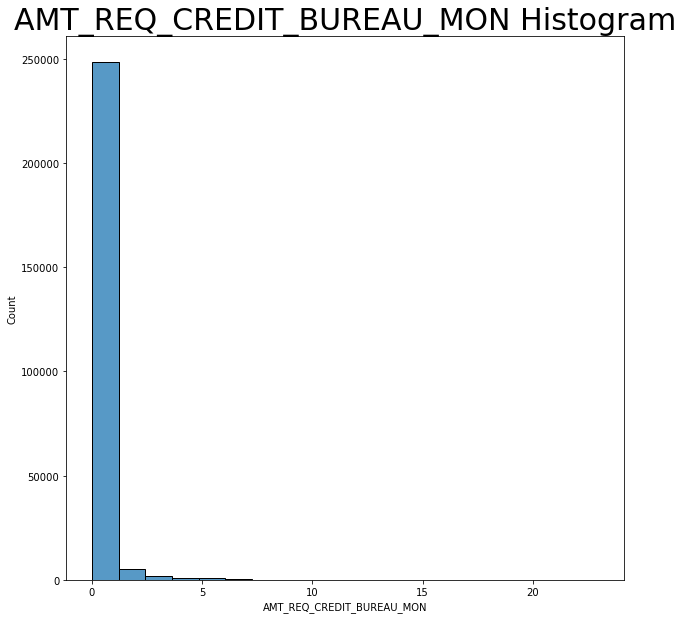

In [16]:

plt.figure(figsize=(10,10))
sns.histplot(df_sess_4["AMT_REQ_CREDIT_BUREAU_MON"])
plt.title("AMT_REQ_CREDIT_BUREAU_MON Histogram", fontsize=30)
plt.show()


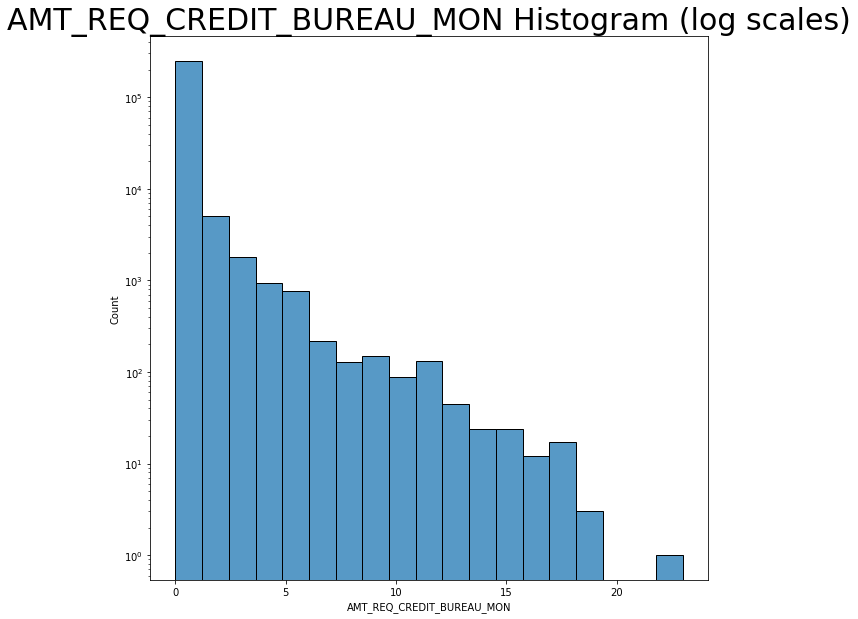

In [17]:

plt.figure(figsize=(10,10))
sns.histplot(df_sess_4["AMT_REQ_CREDIT_BUREAU_MON"])
plt.yscale("log")
plt.title("AMT_REQ_CREDIT_BUREAU_MON Histogram (log scales)", fontsize=30)
plt.show()


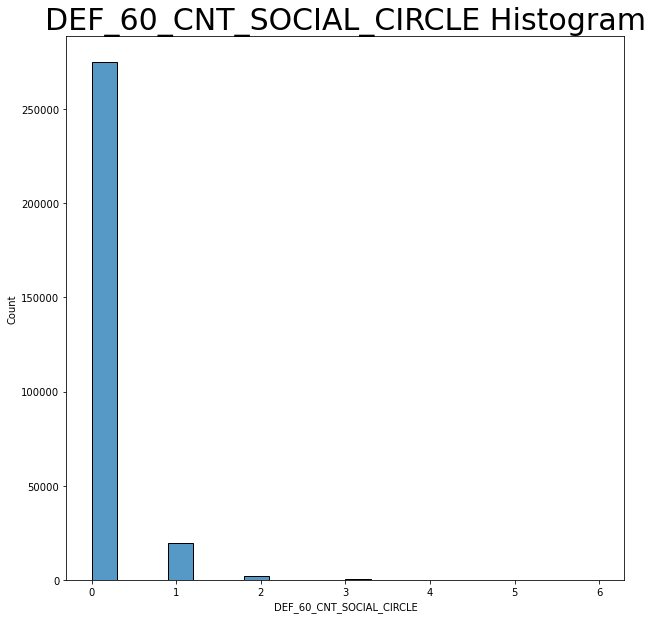

In [18]:

plt.figure(figsize=(10,10))
sns.histplot(df_sess_4["DEF_60_CNT_SOCIAL_CIRCLE"])
plt.title("DEF_60_CNT_SOCIAL_CIRCLE Histogram", fontsize=30)
plt.show()


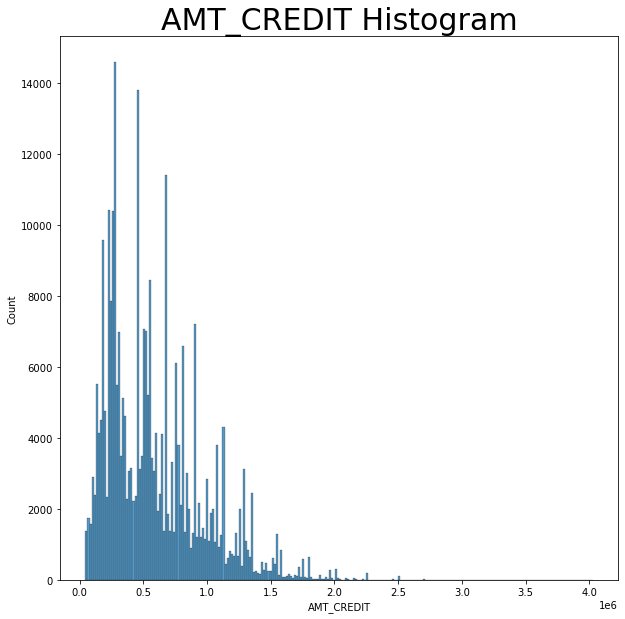

In [19]:


plt.figure(figsize=(10,10))
sns.histplot(df_sess_4["AMT_CREDIT"])
plt.title("AMT_CREDIT Histogram", fontsize=30)
plt.show()



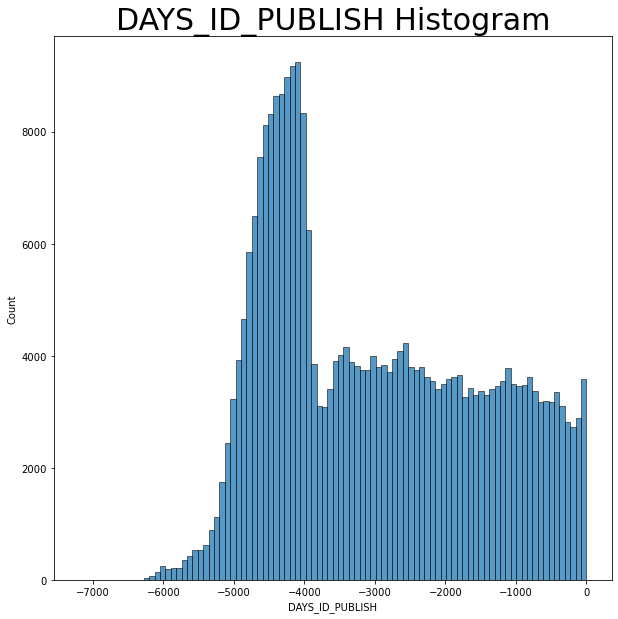

In [21]:

plt.figure(figsize=(10,10))
sns.histplot(df_sess_4["DAYS_ID_PUBLISH"])
plt.title("DAYS_ID_PUBLISH Histogram", fontsize=30)
plt.show()


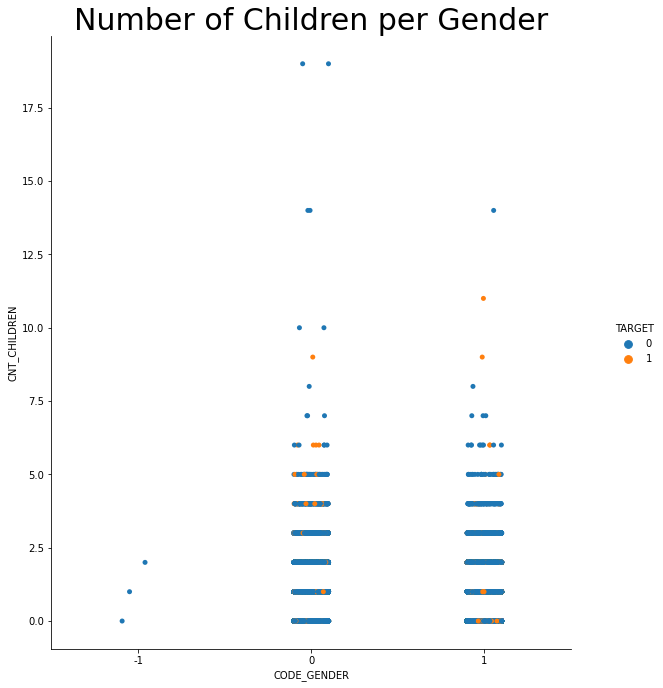

In [36]:

cat_plo_1 = sns.catplot(x="CODE_GENDER", y="CNT_CHILDREN", hue="TARGET", data=df_sess_4)

cat_plo_1.fig.set_figheight(10)
cat_plo_1.fig.set_figwidth(10)

plt.title("Number of Children per Gender", fontsize=30)
plt.show()



# 3. Colinealidad


In [38]:

numeric_vars = df_sess_4._get_numeric_data()


In [39]:
numeric_vars

,TARGET,CODE_GENDER,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,Age
0,1,1,0,406597.5,24700.5,351000.0,0.018801,-637,-3648.0,-2120,...,0,1,2,2,0,2.0,2.0,-1134.0,0.0,25.920547
1,0,0,0,1293502.5,35698.5,1129500.0,0.003541,-1188,-1186.0,-291,...,0,1,1,1,0,0.0,0.0,-828.0,0.0,45.931507
2,0,1,0,135000.0,6750.0,135000.0,0.010032,-225,-4260.0,-2531,...,1,1,2,2,0,0.0,0.0,-815.0,0.0,52.180820
3,0,0,0,312682.5,29686.5,297000.0,0.008019,-3039,-9833.0,-2437,...,0,0,2,2,0,0.0,0.0,-617.0,NaN,52.068493
4,0,1,0,513000.0,21865.5,513000.0,0.028663,-3038,-4311.0,-3458,...,0,0,2,2,1,0.0,0.0,-1106.0,0.0,54.608219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,1,0,254700.0,27558.0,225000.0,0.032561,-236,-8456.0,-1982,...,0,0,1,1,0,0.0,0.0,-273.0,NaN,25.553425
307507,0,0,0,269550.0,12001.5,225000.0,0.025164,365243,-4388.0,-4090,...,0,1,2,2,0,0.0,0.0,0.0,NaN,56.917809
307508,0,0,0,677664.0,29979.0,585000.0,0.005002,-7921,-6737.0,-5150,...,0,0,3,3,1,0.0,0.0,-1909.0,1.0,41.002739
307509,1,0,0,370107.0,20205.0,319500.0,0.005313,-4786,-2562.0,-931,...,0,0,2,2,1,0.0,0.0,-322.0,0.0,32.769863


In [41]:

variables_of_interest = df_sess_4[["TARGET", "CODE_GENDER", "CNT_CHILDREN", "AMT_CREDIT", "AMT_ANNUITY",
                                  "Age", "DAYS_EMPLOYED"]]


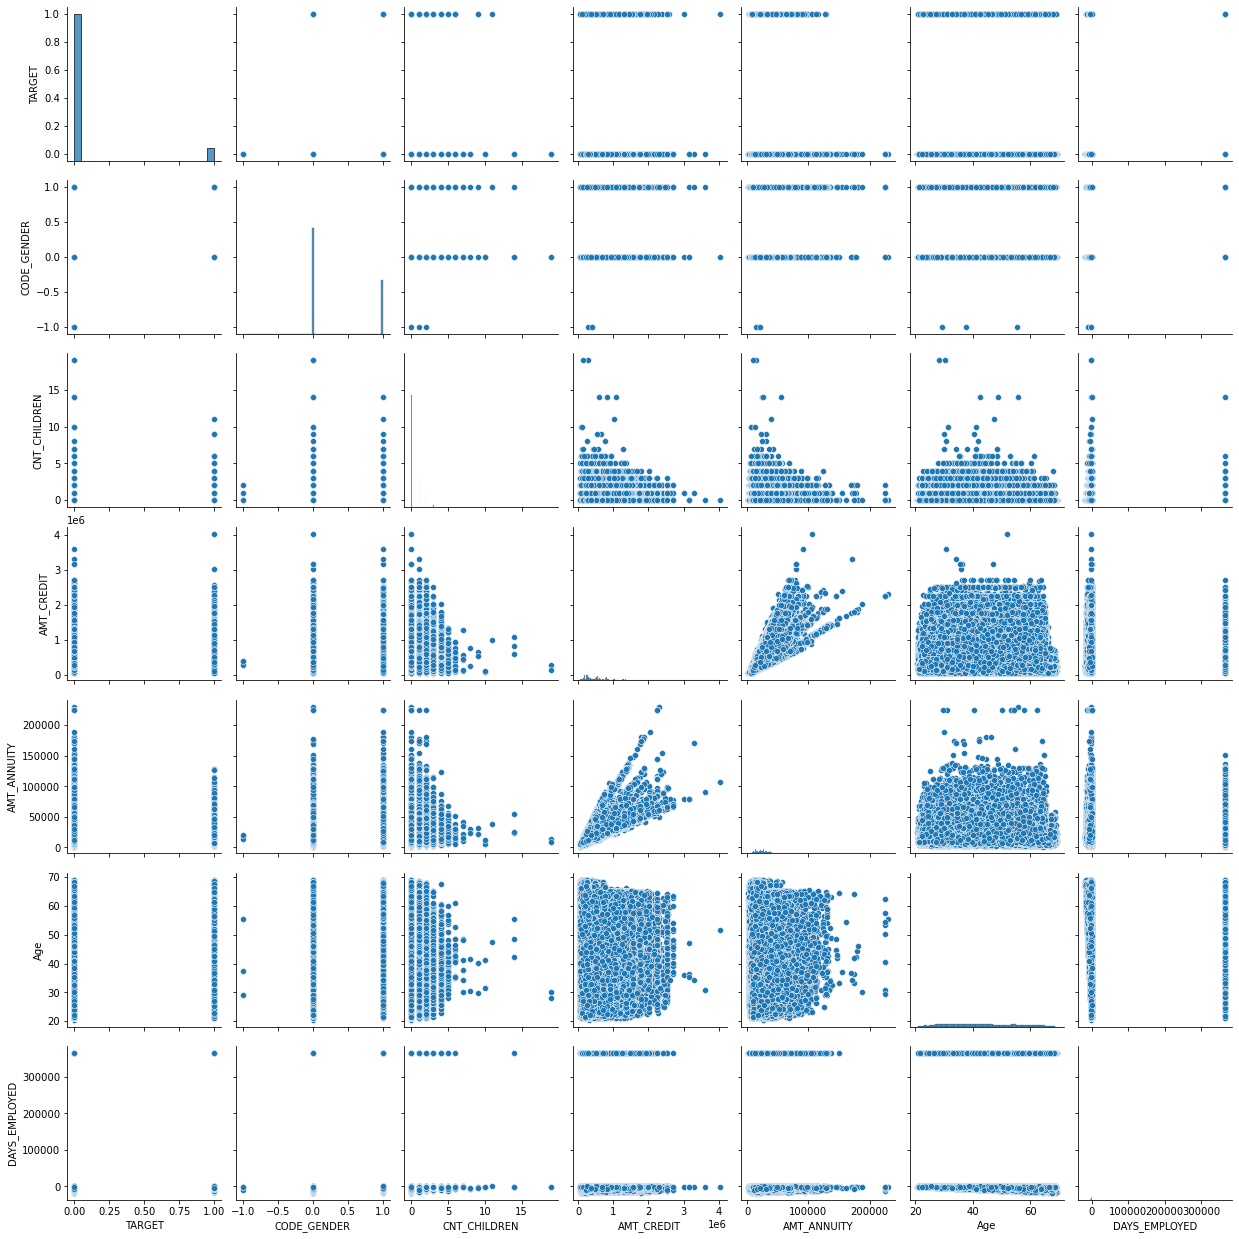

In [51]:

sns.pairplot(variables_of_interest)


In [44]:

correlation_table = df_sess_4.corr()


In [45]:
correlation_table

,TARGET,CODE_GENDER,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,Age
TARGET,1.000000,0.056054,0.019211,-0.025990,-0.007346,-0.035862,-0.032619,-0.044708,0.041559,0.051964,...,0.029090,-0.022414,0.055964,0.057926,0.050969,0.032407,0.031290,0.054994,-0.009916,-0.078138
CODE_GENDER,0.056054,1.000000,0.045690,0.014222,0.074151,0.015007,0.009494,-0.162335,0.078976,0.000433,...,0.030457,-0.023332,-0.015709,-0.014732,0.138125,-0.023677,-0.020679,0.027638,0.006339,-0.152621
CNT_CHILDREN,0.019211,0.045690,1.000000,-0.000738,0.019554,-0.005300,-0.026250,-0.239005,0.183268,-0.030745,...,0.049911,-0.031927,0.026521,0.025885,0.066945,-0.003579,-0.004115,-0.005396,-0.010778,-0.329905
AMT_CREDIT,-0.025990,0.014222,-0.000738,1.000000,0.761171,0.985820,0.049625,-0.081858,0.014611,-0.004296,...,-0.034268,0.006373,-0.066767,-0.075613,-0.023169,-0.032186,-0.034072,-0.070935,0.034239,0.050988
AMT_ANNUITY,-0.007346,0.074151,0.019554,0.761171,1.000000,0.765396,0.071019,-0.121797,0.045944,0.015398,...,-0.036164,-0.008636,-0.096067,-0.109544,-0.001270,-0.030107,-0.030712,-0.060153,0.021948,-0.018703
AMT_GOODS_PRICE,-0.035862,0.015007,-0.005300,0.985820,0.765396,1.000000,0.053938,-0.079440,0.016544,-0.007186,...,-0.012922,0.022208,-0.068681,-0.076775,-0.025576,-0.033693,-0.035387,-0.073774,0.036691,0.049482
REGION_POPULATION_RELATIVE,-0.032619,0.009494,-0.026250,0.049625,0.071019,0.053938,1.000000,-0.027417,-0.040066,-0.000381,...,-0.023690,0.065077,-0.499179,-0.498530,-0.042840,0.000987,-0.002422,-0.035750,0.042099,0.014715
DAYS_EMPLOYED,-0.044708,-0.162335,-0.239005,-0.081858,-0.121797,-0.079440,-0.027417,1.000000,-0.206525,-0.273951,...,-0.225943,0.008260,0.042771,0.045205,-0.247962,-0.004856,-0.009514,0.027186,-0.039898,0.612351
DAYS_REGISTRATION,0.041559,0.078976,0.183268,0.014611,0.045944,0.016544,-0.040066,-0.206525,1.000000,0.099886,...,0.056670,-0.070097,0.074144,0.067578,0.098656,0.010903,0.012265,0.054891,-0.006078,-0.329295
DAYS_ID_PUBLISH,0.051964,0.000433,-0.030745,-0.004296,0.015398,-0.007186,-0.000381,-0.273951,0.099886,1.000000,...,0.045262,-0.035708,-0.006993,-0.009719,0.099406,0.007506,0.009516,0.087474,-0.009102,-0.271367


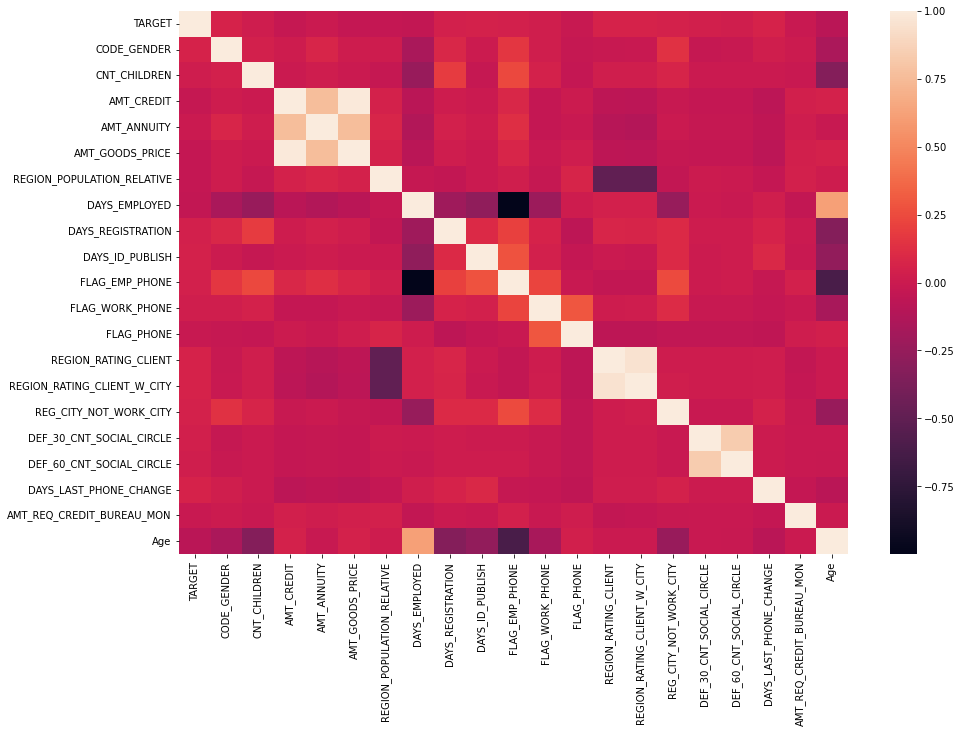

In [47]:

plt.figure(figsize=(15,10))
sns.heatmap(correlation_table)
plt.show()



# Multicolinealidad.

# Variance Inflation Factor


In [48]:

def calculate_vif(df: pd.DataFrame, cols):
    """
    This function calculates the VIF
    for a set of columns, given a dataframe. 
    """
    
    X = df[cols]
    X['intercept'] = 1
    
    vif = pd.DataFrame()
    vif["variable"] = X.columns
    
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    vif = vif[vif["variable"]!='inter']
    
    return vif
    


In [49]:
calculate_vif(df_sess_4, numeric_vars.columns)

/tmp/ipykernel_12664/689101630.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


MissingDataError: exog contains inf or nans

In [50]:
df_sess_4.isna().sum()

TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                  963
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_PHONE                         0
OCCUPATION_TYPE                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
REG_CITY_NOT_WORK_CITY             0
ORGANIZATION_TYPE                  0
DEF_30_CNT_SOCIAL_CIRCLE         990
D